# The PayScale Dataset 2021

In [1]:
# Preliminary Data Exploration

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
raw_csv_path = './raw_csv/raw_college_salary_report_2021.csv'
raw_df = pd.read_csv(raw_csv_path)

In [3]:
raw_df.head(5)

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,-,-,-,Median salary for alumni with 0-5 years experi...,Median salary for alumni with 10+ years experi...,% alumni who say their work makes the world a ...
1,1,Petroleum Engineering,Bachelors,"$93,200","$187,300",67%
2,2,Operations Research & Industrial Engineering,Bachelors,"$84,800","$170,400",28%
3,3,Electrical Engineering & Computer Science (EECS),Bachelors,"$108,500","$159,300",46%
4,4,Interaction Design,Bachelors,"$68,300","$155,800",55%


In [4]:
raw_df.shape

(828, 6)

In [5]:
raw_df.describe()

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
count,828,828,828,828,828,828
unique,507,828,2,329,507,73
top,397,-,Bachelors,"$47,700","$85,900",-
freq,7,1,827,12,7,64


In [6]:
raw_df['Degree Type'].value_counts()  
# --> Only 'Bachelors' in 'Degree Type', except '-' in info-row.

Bachelors    827
-              1
Name: Degree Type, dtype: int64

**Check for duplicates**

In [7]:
# Check for duplicates:

print(f'{raw_df.duplicated().any() = }') 
# Returns true if any duplicates of a whole row

print(f'{raw_df["Major"].duplicated().any() = }')
# Returns true if any duplicates in column 'Major'

raw_df.duplicated().any() = False
raw_df["Major"].duplicated().any() = False


**Check index - reset if necessary**

In [8]:
raw_df.index.values  # --> Repeating index-pattern.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24

In [9]:
raw_df.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
df = raw_df.reset_index(drop=True) 
# drop=True --> avoid the old index being added as a column
df

,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,-,-,-,Median salary for alumni with 0-5 years experi...,Median salary for alumni with 10+ years experi...,% alumni who say their work makes the world a ...
1,1,Petroleum Engineering,Bachelors,"$93,200","$187,300",67%
2,2,Operations Research & Industrial Engineering,Bachelors,"$84,800","$170,400",28%
3,3,Electrical Engineering & Computer Science (EECS),Bachelors,"$108,500","$159,300",46%
4,4,Interaction Design,Bachelors,"$68,300","$155,800",55%
...,...,...,...,...,...,...
823,823,Outdoor Education,Bachelors,"$37,400","$46,300",52%
824,824,Early Childhood Education,Bachelors,"$36,100","$45,400",78%
825,825,Mental Health,Bachelors,"$36,900","$45,000",-
826,826,Medical Assisting,Bachelors,"$36,000","$44,800",-


---

## Initial remarks

1. There are 827 different Majors.

2.   Row 0 contains definitions for some of the column lables --> **Delete row 0.** ✅
    
3.   The index is repeating itself --> **Reset index.** ✅

4.   'Rank': The majors are ranked by "Mid-Career Pay"-values. Majors with the same Mid-Career Pay, have the same ranking. Do not need this column --> **Delete 'Rank'** ✅

5.   'Degree Type': There are only Bachelors. --> **Delete 'Degree Type'.** ✅

6.   There are some missing values, represented by "-".

7.   Check datatypes.

---

In [11]:
df.shape

(828, 6)

In [12]:
# (2) Delete row 0.
df = df.drop([0]) 
df.shape

(827, 6)

In [13]:
# (4)(5) Delete two columns.
df = df.drop(labels=['Rank', 'Degree Type'], axis=1) 
df

,Major,Early Career Pay,Mid-Career Pay,% High Meaning
1,Petroleum Engineering,"$93,200","$187,300",67%
2,Operations Research & Industrial Engineering,"$84,800","$170,400",28%
3,Electrical Engineering & Computer Science (EECS),"$108,500","$159,300",46%
4,Interaction Design,"$68,300","$155,800",55%
5,Public Accounting,"$59,800","$147,700",47%
...,...,...,...,...
823,Outdoor Education,"$37,400","$46,300",52%
824,Early Childhood Education,"$36,100","$45,400",78%
825,Mental Health,"$36,900","$45,000",-
826,Medical Assisting,"$36,000","$44,800",-


---
**5. There are some missing values, represented by "-".**

✅ Replace '-' with '-1'.

**6. Check data-types**

✅ Make sure the numbers are int or float.

---

In [14]:
df.dtypes

Major               object
Early Career Pay    object
Mid-Career Pay      object
% High Meaning      object
dtype: object

In [15]:
num_df = df.replace('\$|,|%', '', regex=True)
num_df.head(5)

,Major,Early Career Pay,Mid-Career Pay,% High Meaning
1,Petroleum Engineering,93200,187300,67
2,Operations Research & Industrial Engineering,84800,170400,28
3,Electrical Engineering & Computer Science (EECS),108500,159300,46
4,Interaction Design,68300,155800,55
5,Public Accounting,59800,147700,47


In [16]:
num_df['Early Career Pay'] = num_df['Early Career Pay'].astype(float)
num_df['Mid-Career Pay'] = num_df['Mid-Career Pay'].astype(float)
num_df['% High Meaning'] = num_df['% High Meaning'].replace(['-'], [-1]).astype(float)  
# Replace '-' with -1, and convert column to integers.

In [17]:
num_df.dtypes

Major                object
Early Career Pay    float64
Mid-Career Pay      float64
% High Meaning      float64
dtype: object

In [18]:
num_df.head(5)

,Major,Early Career Pay,Mid-Career Pay,% High Meaning
1,Petroleum Engineering,93200.0,187300.0,67.0
2,Operations Research & Industrial Engineering,84800.0,170400.0,28.0
3,Electrical Engineering & Computer Science (EECS),108500.0,159300.0,46.0
4,Interaction Design,68300.0,155800.0,55.0
5,Public Accounting,59800.0,147700.0,47.0


---

# Styling

``df.style``


``df.style.format()``

keyword arguments:

*   precision: int= 0       
    * \# of decimals.
*   thousands: str= ' '
    * thousands separator, f.eks. ' ' (space).
*   formatter={
          ('column name'): 'formatting string'
}
    * Where formatting string is like an f-string, with python formatting-syntax. '$ {}'

In [19]:
df.describe()  # Without any styling

,Major,Early Career Pay,Mid-Career Pay,% High Meaning
count,827,827,827,827
unique,827,328,506,72
top,Petroleum Engineering,"$47,700","$85,900",-
freq,1,12,7,64


In [20]:
df = num_df
df.describe().style.format(precision=0, thousands=' ')
# With no decimals and space as thousands separator.

,Early Career Pay,Mid-Career Pay,% High Meaning
count,827,827,827
mean,52 694,87 557,50
std,10 434,21 384,20
min,34 500,40 300,-1
25%,45 100,72 100,42
50%,50 200,85 200,50
75%,59 050,100 850,62
max,108 500,187 300,93


In [21]:
df.head(5).style.format(thousands=' ',
                        formatter={
                            ('Early Career Pay'): '$ {:,.0f}',
                            ('Mid-Career Pay'): '$ {:.0f}',
                            ('% High Meaning'): '{:.0f} %'
                        })
# If ',' in the formatting-string is included, 
# the thousands separator defined above is used.

,Major,Early Career Pay,Mid-Career Pay,% High Meaning
1,Petroleum Engineering,$ 93 200,$ 187300,67 %
2,Operations Research & Industrial Engineering,$ 84 800,$ 170400,28 %
3,Electrical Engineering & Computer Science (EECS),$ 108 500,$ 159300,46 %
4,Interaction Design,$ 68 300,$ 155800,55 %
5,Public Accounting,$ 59 800,$ 147700,47 %


In [22]:
# background_gradient requires matplotlib.

def make_pretty(styler):
    styler.set_caption("Highest Paying Jobs With a Bachelor’s Degree")
    styler.format(thousands=' ',
                        formatter={
                            ('Early Career Pay'): '$ {:,.0f}',
                            ('Mid-Career Pay'): '$ {:,.0f}',
                            ('% High Meaning'): '{:.0f} %'
                        })
    #styler.background_gradient(axis=None, vmin=147700, vmax=187300, cmap='YlGnBu')
    styler.background_gradient(axis=None, cmap='Blues')
    return styler

df.loc[1:5, 'Major':'Mid-Career Pay'].style.pipe(make_pretty)

,Major,Early Career Pay,Mid-Career Pay
1,Petroleum Engineering,$ 93 200,$ 187 300
2,Operations Research & Industrial Engineering,$ 84 800,$ 170 400
3,Electrical Engineering & Computer Science (EECS),$ 108 500,$ 159 300
4,Interaction Design,$ 68 300,$ 155 800
5,Public Accounting,$ 59 800,$ 147 700


---

# Statistics



## Early Career Pay

### **Majors with lowest Early Career Pay:**

In [62]:
low_ecp = df.sort_values(by='Early Career Pay', ascending=True, ignore_index=True).head(5)
low_ecp_df = low_ecp.loc[0:,['Major', 'Early Career Pay']]
low_ecp_df.style.pipe(make_pretty)

,Major,Early Career Pay
0,Voice & Opera,$ 34 500
1,Painting & Printmaking,$ 34 700
2,Psychology & Human Services,$ 35 600
3,Equine Studies,$ 35 700
4,Rehabilitation Services,$ 35 800


### **Majors with highest Early Career Pay:**

In [75]:
high_ecp = df.sort_values(by='Early Career Pay', ascending=False, ignore_index=True).head(5)
high_ecp.style.pipe(make_pretty)

Major,Early Career Pay,Mid-Career Pay,% High Meaning
Electrical Engineering & Computer Science (EECS),$ 108 500,$ 159 300,46 %
Physician Assistant Studies,$ 95 900,$ 118 500,84 %
Petroleum Engineering,$ 93 200,$ 187 300,67 %
Operations Research & Industrial Engineering,$ 84 800,$ 170 400,28 %
Nuclear Engineering Technology (NET),$ 83 500,$ 106 000,62 %


In [77]:
high_ecp_df = high_ecp.loc[0:, ['Major', 'Early Career Pay']]
high_ecp_df.style.pipe(make_pretty).hide()

Major,Early Career Pay
Electrical Engineering & Computer Science (EECS),$ 108 500
Physician Assistant Studies,$ 95 900
Petroleum Engineering,$ 93 200
Operations Research & Industrial Engineering,$ 84 800
Nuclear Engineering Technology (NET),$ 83 500


<Axes: xlabel='Major'>

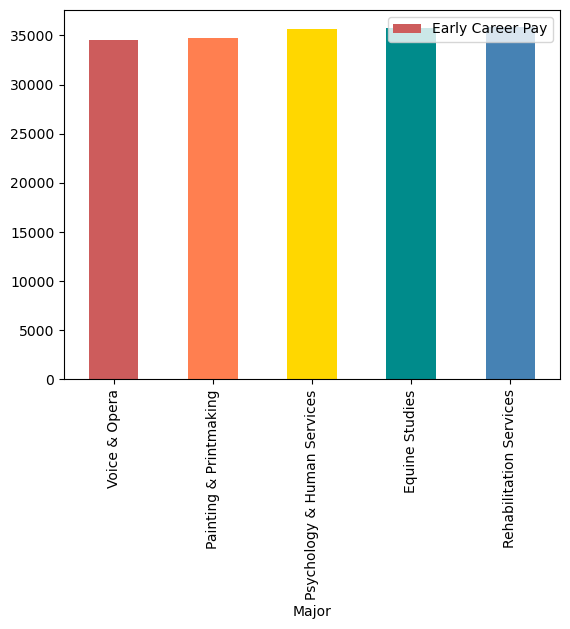

In [57]:
high_ecp_plot = high_ecp.head(5).plot(x='Major', y='Early Career Pay', kind='bar', 
                              color=['indianred', 'coral', 'gold', 'darkcyan', 'steelblue'])
high_ecp_plot

### **Highest and lowest Early career pay**

In [163]:
high_low_ecp_df = pd.concat([low_ecp, high_ecp])
high_low_ecp_df = high_low_ecp_df.sort_values(by='Early Career Pay').reset_index()
high_low_ecp_table = high_low_ecp_df.loc[0:,['Major', 'Early Career Pay']]
high_low_ecp_table.style.pipe(make_pretty).hide()

Major,Early Career Pay
Voice & Opera,$ 34 500
Painting & Printmaking,$ 34 700
Psychology & Human Services,$ 35 600
Equine Studies,$ 35 700
Rehabilitation Services,$ 35 800
Nuclear Engineering Technology (NET),$ 83 500
Operations Research & Industrial Engineering,$ 84 800
Petroleum Engineering,$ 93 200
Physician Assistant Studies,$ 95 900
Electrical Engineering & Computer Science (EECS),$ 108 500


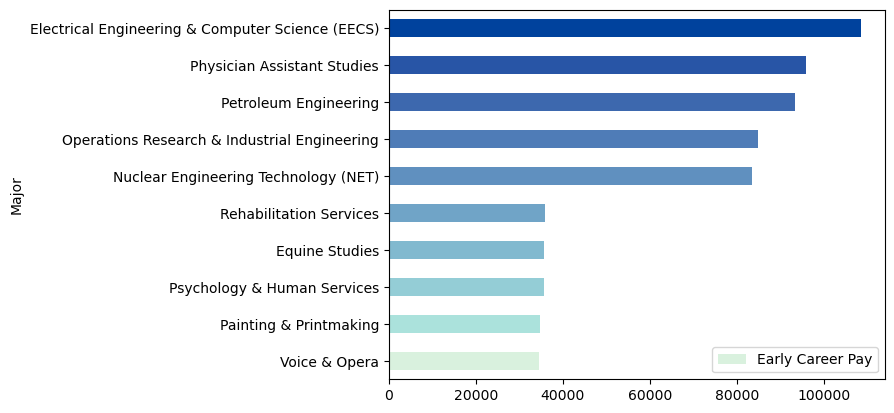

In [173]:
colors = ['#00429d', '#2855a6', '#3d68ae', '#4f7cb7', '#6090bf', '#70a4c7', '#81b9cf', '#94cdd6', '#abe2dc', '#d9f1de']
c = list(reversed(colors))
# Find nice colors at: https://gka.github.io/palettes
high_low_ecp_plot = high_low_ecp_df.plot(x='Major', y='Early Career Pay', kind='barh', color=c)

In [137]:
ecp = high_low_ecp_df['Early Career Pay'].to_list()
mcp = high_low_ecp_df['Mid-Career Pay'].to_list()
index = high_low_ecp_df['Major']
ecp_df = pd.DataFrame({
    'Early career pay': ecp,
    'Mid-Career Pay': mcp
}, index=index)
# ecp_ax = ecp_df.plot.bar(rot=90, color=['#70a4c7', '#3d68ae'])

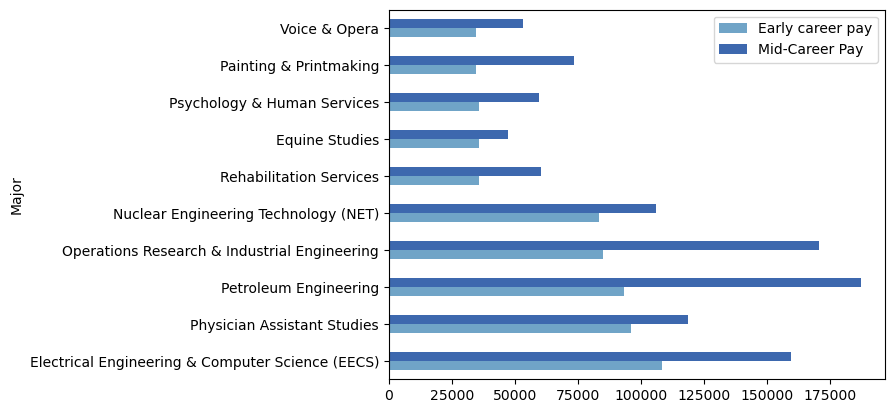

In [136]:
ecp_ax2 = ecp_df.plot.barh(color=['#70a4c7', '#3d68ae'])

## Mid-Career Pay

In [159]:
low_mcp_df = df.sort_values(by='Mid-Career Pay', ascending=True).head(5)
high_mcp_df = df.sort_values(by='Mid-Career Pay', ascending=False).head(5)

low_high_mcp_df = pd.concat([low_mcp_df, high_mcp_df])
low_high_mcp_df = low_high_mcp_df.sort_values(by='Mid-Career Pay')
low_high_mcp_df.style.pipe(make_pretty)

,Major,Early Career Pay,Mid-Career Pay,% High Meaning
827,Metalsmithing,$ 40 000,$ 40 300,33 %
826,Medical Assisting,$ 36 000,$ 44 800,-1 %
825,Mental Health,$ 36 900,$ 45 000,-1 %
824,Early Childhood Education,$ 36 100,$ 45 400,78 %
823,Outdoor Education,$ 37 400,$ 46 300,52 %
5,Public Accounting,$ 59 800,$ 147 700,47 %
4,Interaction Design,$ 68 300,$ 155 800,55 %
3,Electrical Engineering & Computer Science (EECS),$ 108 500,$ 159 300,46 %
2,Operations Research & Industrial Engineering,$ 84 800,$ 170 400,28 %
1,Petroleum Engineering,$ 93 200,$ 187 300,67 %


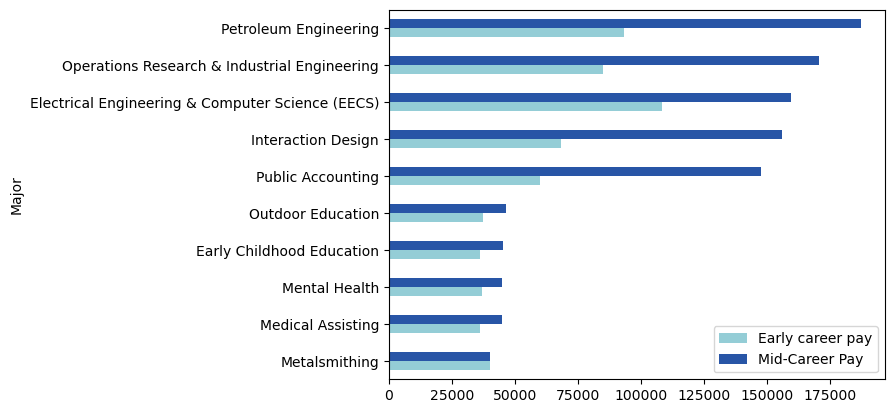

In [175]:
mcp_df = pd.DataFrame({'Early career pay': low_high_mcp_df['Early Career Pay'].to_list(),
                       'Mid-Career Pay': low_high_mcp_df['Mid-Career Pay'].to_list()}, 
                      index=low_high_mcp_df['Major'])
mcp_ax = mcp_df.plot.barh(color=['#94cdd6', '#2855a6'])

# Highest increase in median salary from early to mid-career.

In [ ]:
# increase_col = df['Mid-Career Pay'] - df['Early Career Pay']
# df.insert(3, 'Increase', increase_col)

In [182]:
high_increase_df = df.sort_values(by='Increase', ascending=False).head(10)
# pd.options.display.float_format = '{:,.2f}'.format  # Format output numbers.
high_increase_df

,Major,Early Career Pay,Mid-Career Pay,Increase,% High Meaning
1,Petroleum Engineering,"93,200.00","187,300.00","94,100.00",67.00
5,Public Accounting,"59,800.00","147,700.00","87,900.00",47.00
4,Interaction Design,"68,300.00","155,800.00","87,500.00",55.00
2,Operations Research & Industrial Engineering,"84,800.00","170,400.00","85,600.00",28.00
11,Information & Computer Science,"58,600.00","140,900.00","82,300.00",62.00
17,Building Science,"53,800.00","135,900.00","82,100.00",53.00
16,Aerospace Studies,"55,800.00","136,600.00","80,800.00",-1.00
7,Applied Economics and Management,"66,100.00","146,400.00","80,300.00",67.00
9,Actuarial Mathematics,"64,300.00","143,400.00","79,100.00",51.00
29,Entrepreneurship & Marketing,"51,400.00","129,800.00","78,400.00",45.00


# Next
Work with bar(h) plots. E.g. add x-axis labels, units, header, figure text (?).
Make functions for styling different things.